# K-NN

## Importing the libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, sklearn untuk klasifikasi pada K-NN dan menghasilkan confusion matrix

## Importing the dataset

In [11]:
dataset = pd.read_csv('Iris.csv')

Membaca file dataset iris.csv

## Splitting the dataset into the Training set and Test set

In [12]:
X = dataset.iloc[:, 1:5].values 
y = dataset.iloc[:, 5].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Memisahkan X dan Y 
X untuk data fitur(independent variabel) yang digunakan untuk memprediksi. 
Y untuk data target(dependent variabel) yang ingin diprediksi 

X disini untuk fitur bagian SepalLength,SepalWidth,PetalLength,dan PetalWidth Y untuk fitur iris-setosa,iris-versicolor,iris-virginica

Membagi dataset antara data training dan data testing, pada codingan data testing yang dipakai sekitar 20%, data training jadi 80%.
Pada random state memastikan datanya dibagi dengan cara yang sama agar dapat memastikan hasilnya konsisten.

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pakai StandarScaler untuk membuat objek pada scaler agar dapat membantu dalam mengubah data jadi lebih mudah dipahami sama model. Serta agar semua fiturnya berada di skala yang sama tidak ada fitur lebih dominan
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata. 

## Training the K-NN model on the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

Melakukan training model K-NN dengan membuat objek pada KNeighboardsClassifier pakai data training. Pada n_neighbors nya 5 yang berarti menggunakan 5 tetangga terdekat yang akan di pertimbangkan saat bikin prediksi. Metricnya yang digunakan adalah minkowski untuk menghitung jarak antara titik-titik data. 

## Predicting and Evaluating the model

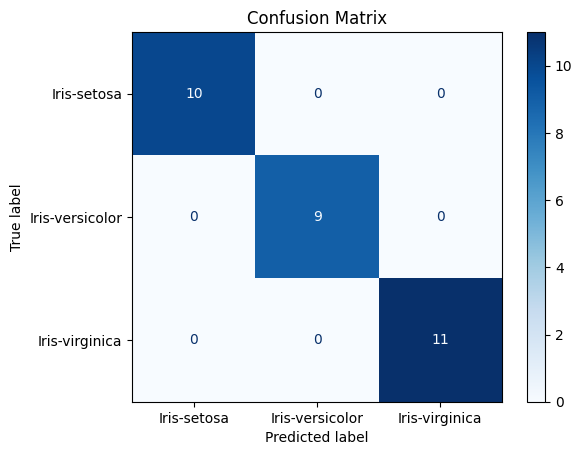

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [8]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting test set results
y_pred = knn_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


Melakukan prediksi pada hasil test results dengan menggunakan data testing dan nyimpan hasil prediksinya pada y_pred

Pada hasil Confusion Matrix terdapat:

Kelas Iris-setosa memiliki nilai TP(True Positive) 10 dan TN(True Negative) 20

Kelas Iris-versicolor memiliki nilai TP(True Positive) 9 dan TN(True Negative) 21

Kelas Iris-virginica memiliki nilai TP(True Positive) 11 dan TN(True Negative) 19

Dan memperoleh nilai Precisionnya 1.00 , Recall 1.00 dan F1-Score 1.00, yang berarti hasil model tersebut memiliki kinerja yang baik.